In [75]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
data = pd.read_csv('Clean Data.csv')
X_data = data.drop(columns='price')
Y_data = data['price']

In [77]:
data.head()

,Unnamed: 0,price,resid_area,air_qual,room_num,age,dist1,teachers,n_hos_beds,parks,airport_NO,airport_YES,poor_prop_log,crime_rate_log
0,0,24.0,32.31,0.538,6.575,65.2,4.35,24.7,5.480,0.049347,0,1,1.788421,0.006300
1,1,21.6,37.07,0.469,6.421,78.9,4.99,22.2,7.332,0.046146,1,0,2.316488,0.026944
2,2,34.7,37.07,0.469,7.185,61.1,5.03,22.2,7.394,0.045764,1,0,1.615420,0.026924
3,3,33.4,32.18,0.458,6.998,45.8,6.21,21.3,9.268,0.047151,0,1,1.371181,0.031857
4,4,36.2,32.18,0.458,7.147,54.2,6.16,21.3,8.824,0.039474,1,0,1.845300,0.066770


In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size=0.9)

In [79]:
alp = np.logspace(-9, 6, 150)
RidgeCV_model = linear_model.RidgeCV(alphas=alp)
RidgeCV_model.fit(X_train, Y_train)
alpha_RidgeCV = RidgeCV_model.alpha_

In [80]:
Y_predicted = RidgeCV_model.predict(X_test)

print("Coefficients:", RidgeCV_model.coef_)
print("Mean Squared Error : %.2f" %mean_squared_error(
    y_true= Y_test,
    y_pred= Y_predicted
))
print("Coefficient of determination : %.2f" %r2_score(
    y_true= Y_test,
    y_pred= Y_predicted
))


Coefficients: [ 1.01066823e-03 -1.79843647e-02 -1.71447235e+01  2.43014977e+00
  2.49133449e-02 -1.04725273e+00  8.78933957e-01  2.62798146e-01
  4.31907349e+01 -5.58322584e-01  5.58322584e-01 -1.05356878e+01
 -3.16361017e-01]
Mean Squared Error : 15.90
Coefficient of determination : 0.86


In [81]:
#Visualising Predicted And Actual Data Differences
print(len(X_test), len(Y_test), len(Y_predicted))

51 51 51


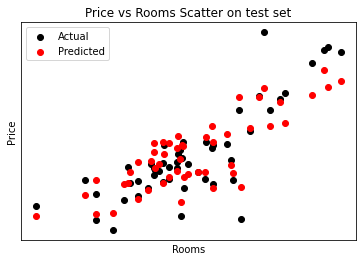

In [82]:
plt.scatter(
    x = X_test['room_num'],
    y = Y_test,
    color = "black",
    label = 'Actual'
)
plt.scatter(
    X_test['room_num'],
    Y_predicted,
    color = "red",
    label = 'Predicted'

)
plt.legend()
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Price vs Rooms Scatter on test set')
plt.xticks(())
plt.yticks(())
plt.savefig('Price(Actual And Predicted) vs Rooms')
plt.show()